In [33]:
import numpy as np
import pandas as pd # data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [34]:
#read file
content_df = pd.read_csv("/kaggle/input/germain/augmenta-oncimmune_assay_data_export_for_rti.tsv", sep="\t", index_col=0)
individual_df = pd.read_csv("/kaggle/input/germain/augmenta-oncimmune_phenotype_export_for_rti.tsv", sep="\t", index_col=0)
content_df_transposed = content_df.T

In [35]:
#convert row to column
content_df_transposed.shape

(103, 1134)

In [36]:
individual_df.shape

(103, 4)

In [37]:
individual_df.index

Index(['COR-7349-D2-POST', 'COR-6215-D2-POST', 'COR-3717-D2-POST',
       'COR-8330-D2-POST', 'COR-8763-D2-POST', 'COR-4361-D2-POST',
       'COR-8843-D2-POST', 'COR-9546-D2-POST', 'COR-1481-D2-POST',
       'COR-5218-D2-POST',
       ...
       'COR-9504-D2-POST', 'COR-6813-D2-POST', 'COR-1699-D2-POST',
       'COR-9633-D2-POST', 'COR-5449-D2-POST', 'COR-5530-D2-POST',
       'COR-5800-Other', 'COR-4582-D1-PRE', 'COR-6048-D1-PRE',
       'COR-3676-Other'],
      dtype='object', name='ParticipantID', length=103)

In [38]:
content_df_transposed.index.name = 'ParticipantID'

In [39]:
merged_df = content_df_transposed.join(individual_df, how='inner')
y= merged_df['Phenotype']

In [40]:
individual_df.head

<bound method NDFrame.head of                  Sample_Source timepoint    cor_id Phenotype
ParticipantID                                               
COR-7349-D2-POST        Plasma   D2-POST  COR-7349    ME/CFS
COR-6215-D2-POST        Plasma   D2-POST  COR-6215    ME/CFS
COR-3717-D2-POST        Plasma   D2-POST  COR-3717    ME/CFS
COR-8330-D2-POST        Plasma   D2-POST  COR-8330    ME/CFS
COR-8763-D2-POST        Plasma   D2-POST  COR-8763    ME/CFS
...                        ...       ...       ...       ...
COR-5530-D2-POST        Plasma   D2-POST  COR-5530        HC
COR-5800-Other          Plasma     Other  COR-5800        HC
COR-4582-D1-PRE         Plasma    D1-PRE  COR-4582    ME/CFS
COR-6048-D1-PRE         Plasma    D1-PRE  COR-6048    ME/CFS
COR-3676-Other          Plasma     Other  COR-3676    ME/CFS

[103 rows x 4 columns]>

In [41]:
content_df_transposed.head

<bound method NDFrame.head of Molecule             ANXA2  ARHGEF11      ASB9       B2M     CACYBP  \
ParticipantID                                                         
COR-7349-D2-POST  7.417853  6.813781  7.523562  6.643856   8.134426   
COR-6215-D2-POST  8.977280  6.882643  9.906139  7.654636   9.350939   
COR-3717-D2-POST  8.022368  6.375039  6.977280  6.499846   8.948367   
COR-8330-D2-POST  9.273796  7.098032  7.813781  7.851749   9.810572   
COR-8763-D2-POST  8.612868  6.636625  7.124121  7.189825   9.153552   
...                    ...       ...       ...       ...        ...   
COR-5530-D2-POST  8.515700  6.942515  8.098032  7.238405   8.917372   
COR-5800-Other    8.266787  6.930737  8.588715  7.442943   8.622052   
COR-4582-D1-PRE   9.806550  8.049849  8.535275  8.584963  10.194757   
COR-6048-D1-PRE   9.415742  7.614710  7.682995  7.982994   9.791163   
COR-3676-Other    8.375039  7.864186  8.303781  7.882643   8.523562   

Molecule              CCNE2      DDX5     CDKN

In [42]:
merged_df.head

<bound method NDFrame.head of                      ANXA2  ARHGEF11      ASB9       B2M     CACYBP  \
ParticipantID                                                         
COR-7349-D2-POST  7.417853  6.813781  7.523562  6.643856   8.134426   
COR-6215-D2-POST  8.977280  6.882643  9.906139  7.654636   9.350939   
COR-3717-D2-POST  8.022368  6.375039  6.977280  6.499846   8.948367   
COR-8330-D2-POST  9.273796  7.098032  7.813781  7.851749   9.810572   
COR-8763-D2-POST  8.612868  6.636625  7.124121  7.189825   9.153552   
...                    ...       ...       ...       ...        ...   
COR-5530-D2-POST  8.515700  6.942515  8.098032  7.238405   8.917372   
COR-5800-Other    8.266787  6.930737  8.588715  7.442943   8.622052   
COR-4582-D1-PRE   9.806550  8.049849  8.535275  8.584963  10.194757   
COR-6048-D1-PRE   9.415742  7.614710  7.682995  7.982994   9.791163   
COR-3676-Other    8.375039  7.864186  8.303781  7.882643   8.523562   

                      CCNE2      DDX5     CDKN

In [43]:
y.head

<bound method NDFrame.head of ParticipantID
COR-7349-D2-POST    ME/CFS
COR-6215-D2-POST    ME/CFS
COR-3717-D2-POST    ME/CFS
COR-8330-D2-POST    ME/CFS
COR-8763-D2-POST    ME/CFS
                     ...  
COR-5530-D2-POST        HC
COR-5800-Other          HC
COR-4582-D1-PRE     ME/CFS
COR-6048-D1-PRE     ME/CFS
COR-3676-Other      ME/CFS
Name: Phenotype, Length: 103, dtype: object>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    merged_df, y, test_size=0.2, stratify=y, random_state=42
)

In [45]:

num_features = X_train.select_dtypes(include=np.number).columns.to_list()
cat_features = X_train.select_dtypes(include=['object']).columns.to_list()

preprocessor = make_column_transformer((StandardScaler(), num_features),
                                      (OneHotEncoder(), cat_features)
                                      )
scaled_data = preprocessor.fit_transform(X_train)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)

[0.4790928  0.06479642]


In [46]:
principal_components[:5]

array([[ 21.07797517, -12.11464129],
       [ 40.73198121,  -4.50157267],
       [ -1.88349351,   3.8138018 ],
       [  9.5361347 ,  -8.36196132],
       [ -8.40696261,  -1.83049504]])

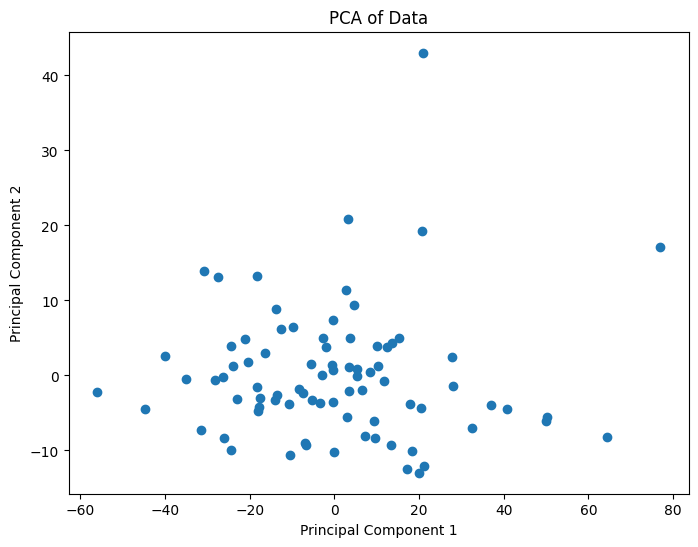

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data')
plt.show()